<a href="https://colab.research.google.com/github/lazy-bro/Boom_Models/blob/main/Flipkart_Reviews_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

file_path = '/content/flipkart_data.csv'
df = pd.read_csv(file_path)


df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [37]:
df.tail(10)

,review,rating
9966,Awesome productREAD MORE,4
9967,Bad product.READ MORE,1
9968,It's tight and not more comfortableREAD MORE,4
9969,Nice productREAD MORE,5
9970,GoodREAD MORE,5
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5
9975,NiceREAD MORE,5


In [38]:
df.dtypes

,0
review,object
rating,int64


In [39]:
df.shape

(9976, 2)

<Axes: xlabel='rating', ylabel='count'>

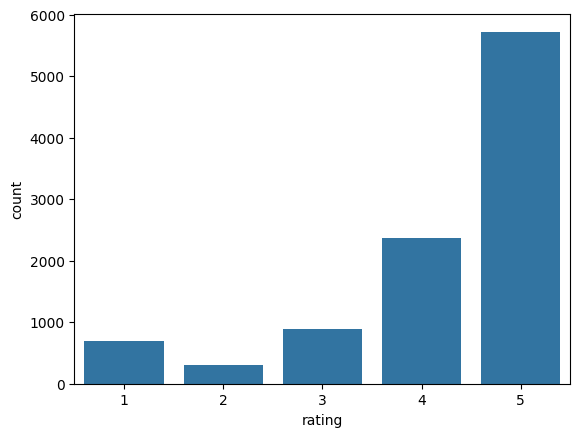

In [40]:
sns.countplot(data=df, x='rating')

In [41]:
my_values=df['rating'].value_counts().values
my_labels=df['rating'].value_counts().index

([<matplotlib.patches.Wedge at 0x7d80e02b6d50>,
 [Text(-0.25335279745754097, 1.0704262515560978, '5'),
  Text(-0.38874445125555707, -1.029017857774109, '4'),
  Text(0.6761231353908002, -0.8676736170872744, '3'),
  Text(1.0075776057583583, -0.44134721974229607, '1'),
  Text(1.0947625053598895, -0.10721500295265568, '2')],
 [Text(-0.13819243497684053, 0.5838688644851442, '57.40%'),
  Text(-0.21204242795757655, -0.5612824678767866, '23.71%'),
  Text(0.36879443748589097, -0.4732765184112405, '8.86%'),
  Text(0.5495877849591044, -0.24073484713216148, '6.93%'),
  Text(0.5971431847417579, -0.05848091070144855, '3.11%')])

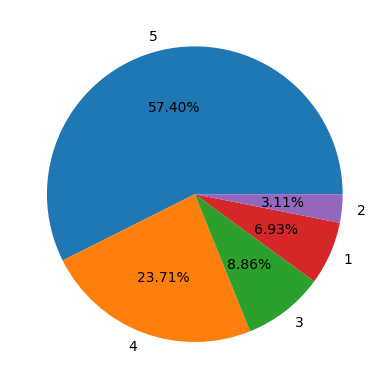

In [42]:
plt.pie(x=my_values, labels=my_labels, autopct='%1.2f%%')

In [43]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_reviews_stopwords(df):
    df['review'] = df['review'].str.lower()
    df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
    return df

df_cleaned = preprocess_reviews_stopwords(df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


([<matplotlib.patches.Wedge at 0x7d80e0927610>,
 [Text(-0.9118165764179391, 0.6152971078832314, '1'),
  Text(0.9118167769071365, -0.6152968107756461, '0')],
 [Text(-0.4973544962279667, 0.3356166042999444, '81.10%'),
  Text(0.49735460558571076, -0.3356164422412615, '18.90%')])

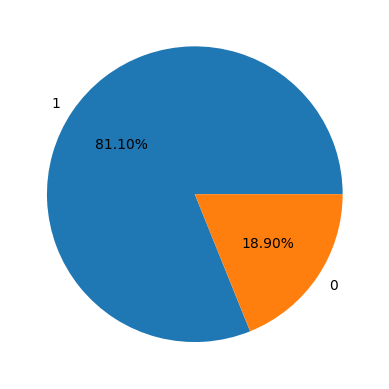

In [44]:
new_values=df['sentiment'].value_counts().values
new_labels=df['sentiment'].value_counts().index
plt.pie(x=new_values, labels=new_labels, autopct='%1.2f%%')

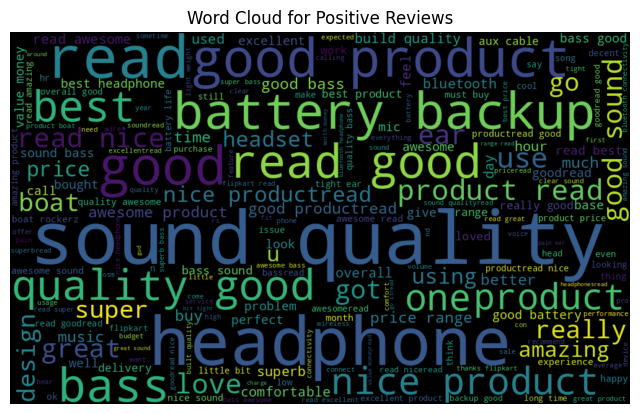

In [45]:
positive_reviews = df_cleaned[df_cleaned['sentiment'] == 1]['review']
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=1000, height=600).generate(positive_text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df_cleaned['review'])
y = df_cleaned['sentiment']


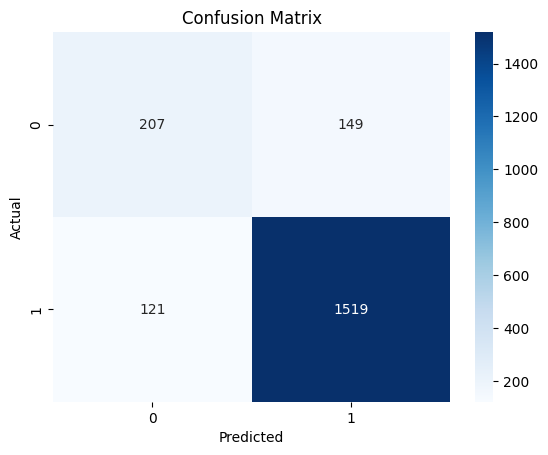

0.8647294589178357


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix , annot=True,fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(accuracy)

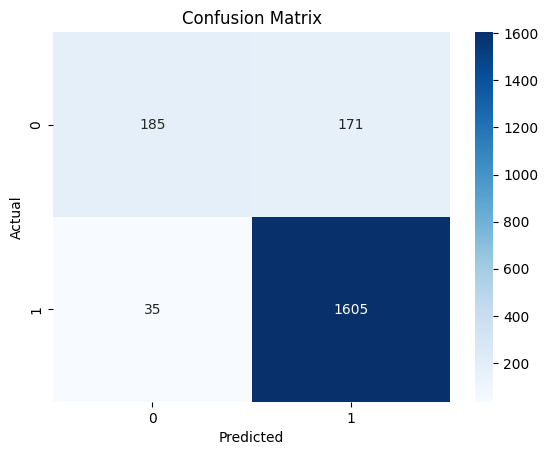

0.8967935871743486


In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix , annot=True,fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(accuracy)